In [1]:
import pandas as pd
import numpy as np

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r'C:\Aabid Study\LEARNING DATA SCIENCE\Projects\Zomato Data Analysis\Resources\zomato_rawdata.sqlite')

In [4]:
df = pd.read_sql("Select * from users", con)

In [5]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df.isnull().sum()/ len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
df['rate'].replace(('NEW','-'), np.nan, inplace = True)

C:\Users\aabid\AppData\Local\Temp\ipykernel_13708\2647609656.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace(('NEW','-'), np.nan, inplace = True)


In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df['rate']= df['rate'].apply(lambda x :float(x.split('/')[0]) if type(x) == str else x )

In [12]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [13]:
x = pd.crosstab(df['rate'],df['online_order'])

In [14]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

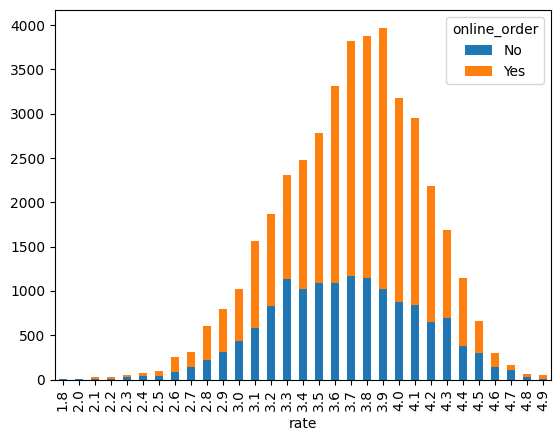

In [15]:
x.plot(kind = 'bar', stacked= True)

In [16]:
x.sum(axis = 1).astype(float)


rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [17]:
normalize_df =x.div(x.sum(axis = 1).astype(float),axis = 0)

In [18]:
normalize_df*100

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


<Axes: xlabel='rate'>

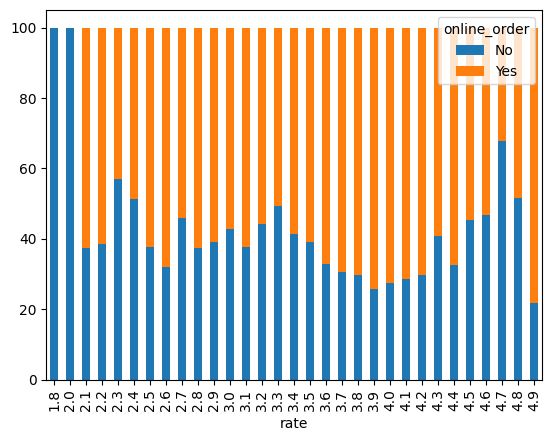

In [19]:
(normalize_df*100).plot(kind='bar',stacked = True)

In [20]:
df['rest_type'].isnull().sum()

np.int64(227)

In [21]:
data = df.dropna(subset=['rest_type'])

In [22]:
data['rest_type'].isnull().sum()

np.int64(0)

In [23]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [24]:
quick_bites_df =data[data['rest_type'].str.contains('Quick Bites')]

In [25]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [26]:
quick_bites_df['reviews_list'] =quick_bites_df['reviews_list'].apply(lambda x :x.lower())

C:\Users\aabid\AppData\Local\Temp\ipykernel_13708\3119713499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] =quick_bites_df['reviews_list'].apply(lambda x :x.lower())


In [27]:
quick_bites_df['reviews_list'].astype(str)

3        [('rated 4.0', "rated\n  great food and proper...
23       [('rated 4.0', "rated\n  so, went here with fr...
26       [('rated 5.0', 'rated\n  please provide some e...
31       [('rated 1.0', "rated\n  worst restaurant ever...
34       [('rated 3.0', 'rated\n  not worth for the mon...
                               ...                        
51641    [('rated 2.0', "rated\n  food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('rated 5.0', "rated\n  i was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [28]:
from nltk.corpus import RegexpTokenizer

In [29]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [30]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [31]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [32]:
sample = data['reviews_list'].apply(tokenizer.tokenize)

In [33]:
sample

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
51712    [Rated, RATED, n, Food, and, service, are, inc...
51713                                                   []
51714                                                   []
51715    [Rated, RATED, n, Nice, and, friendly, place, ...
51716    [Rated, RATED, n, Great, ambience, looking, ni...
Name: reviews_list, Length: 51490, dtype: object

In [34]:
from nltk.corpus import stopwords 

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aabid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
stop = stopwords.words('english')

In [37]:
stop.extend(['rated','n','nan','x','RATED',"Rated"])

In [38]:
rev3 = sample[3]

In [39]:
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [40]:
print([token for token in rev3 if token not in stop ])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [41]:
reviews_clean = sample.apply(lambda each_review: [token for token in each_review if token not in stop])

In [42]:
type(reviews_clean)

pandas.core.series.Series

In [43]:
total_reviews_2d = list(reviews_clean)

In [44]:
total_reviews_1d = []

for review in total_reviews_2d:
    for word in review:
        total_reviews_1d.append(word)


In [45]:
total_reviews_1d

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [46]:
from nltk import FreqDist

In [47]:
fd = FreqDist()

In [48]:
for word in total_reviews_1d:
    fd[word] = fd[word] + 1

In [49]:
fd.most_common(20)

[('place', 958892),
 ('I', 906624),
 ('good', 870711),
 ('food', 800115),
 ('The', 667679),
 ('chicken', 313719),
 ('service', 273865),
 ('ordered', 261388),
 ('taste', 245081),
 ('great', 235933),
 ('really', 234390),
 ('try', 218724),
 ('ambience', 217874),
 ('time', 217257),
 ('one', 213594),
 ('It', 206382),
 ('also', 202443),
 ('like', 197463),
 ('We', 184449),
 ('visit', 183865)]

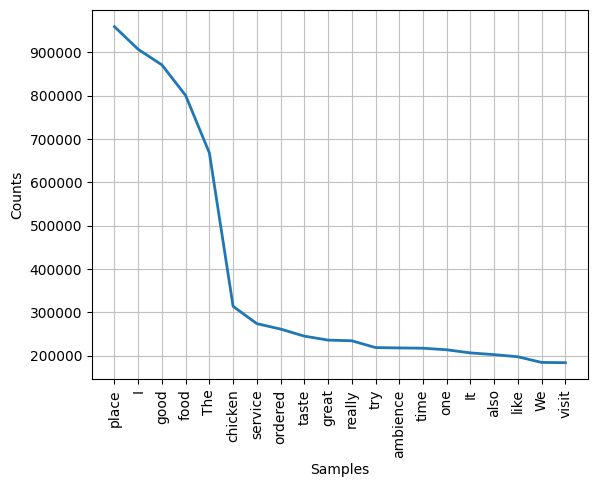

<Axes: xlabel='Samples', ylabel='Counts'>

In [50]:
fd.plot(20)

In [51]:
from nltk import FreqDist, bigrams, trigrams

In [52]:
bi_gram = bigrams(total_reviews_1d)

In [53]:
fd_bigram = FreqDist()
for bigram in bi_gram :
    fd_bigram[bigram] = fd_bigram[bigram]+1 

In [54]:
fd_bigram.most_common(20)

[(('The', 'food'), 70551),
 (('really', 'good'), 64671),
 (('I', 'ordered'), 60088),
 (('This', 'place'), 54963),
 (('must', 'try'), 53865),
 (('We', 'ordered'), 52692),
 (('I', 'would'), 47294),
 (('visit', 'place'), 45409),
 (('The', 'place'), 43758),
 (('food', 'good'), 42791),
 (('good', 'food'), 42433),
 (('f', 'f'), 37330),
 (('good', 'place'), 36570),
 (('main', 'course'), 34713),
 (('The', 'ambience'), 33846),
 (('ice', 'cream'), 33429),
 (('also', 'good'), 32487),
 (('non', 'veg'), 32321),
 (('The', 'service'), 28278),
 (('I', 'tried'), 27983)]

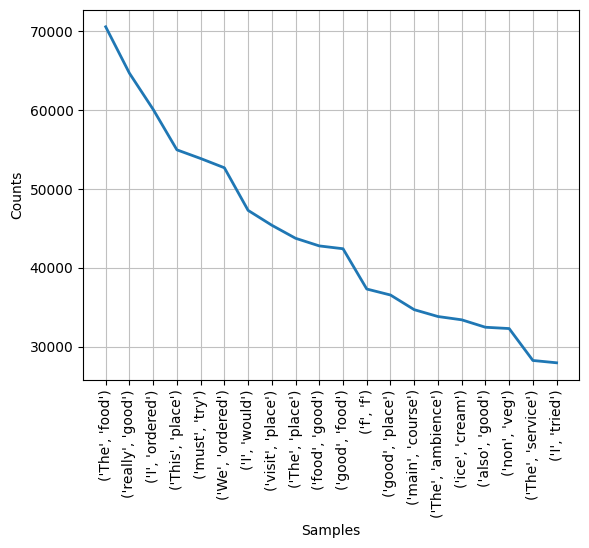

<Axes: xlabel='Samples', ylabel='Counts'>

In [55]:
fd_bigram.plot(20)

In [56]:
fd_bigram.most_common(100)

[(('The', 'food'), 70551),
 (('really', 'good'), 64671),
 (('I', 'ordered'), 60088),
 (('This', 'place'), 54963),
 (('must', 'try'), 53865),
 (('We', 'ordered'), 52692),
 (('I', 'would'), 47294),
 (('visit', 'place'), 45409),
 (('The', 'place'), 43758),
 (('food', 'good'), 42791),
 (('good', 'food'), 42433),
 (('f', 'f'), 37330),
 (('good', 'place'), 36570),
 (('main', 'course'), 34713),
 (('The', 'ambience'), 33846),
 (('ice', 'cream'), 33429),
 (('also', 'good'), 32487),
 (('non', 'veg'), 32321),
 (('The', 'service'), 28278),
 (('I', 'tried'), 27983),
 (('place', 'I'), 27535),
 (('good', 'The'), 26699),
 (('good', 'I'), 25415),
 (('food', 'I'), 25194),
 (('one', 'best'), 24631),
 (('nWe', 'ordered'), 24599),
 (('The', 'staff'), 23847),
 (('nice', 'place'), 23528),
 (('must', 'visit'), 23491),
 (('I', 'love'), 22794),
 (('time', 'I'), 21754),
 (('place', 'good'), 21720),
 (('I', 'loved'), 21398),
 (('place', 'hangout'), 21305),
 (('pretty', 'good'), 21033),
 (('I', 'like'), 20502),
 (

In [57]:
tri_grams = trigrams(total_reviews_1d)

In [58]:
fd_trigram = FreqDist()

for trigram in tri_grams:
    fd_trigram[trigram] = fd_trigram[trigram] + 1

In [59]:
fd_trigram.most_common(50)

[(('f', 'f', 'f'), 19127),
 (('veg', 'non', 'veg'), 9254),
 (('The', 'food', 'good'), 9236),
 (('must', 'visit', 'place'), 9137),
 (('place', 'hangout', 'friends'), 8869),
 (('f', 'c', 'f'), 8001),
 (('xa', 'xa', 'xa'), 7959),
 (('I', 'must', 'say'), 7657),
 (('I', 'visited', 'place'), 7594),
 (('I', 'would', 'recommend'), 6478),
 (('nFood', 'nAmbience', 'nService'), 6236),
 (('I', 'would', 'say'), 5719),
 (('food', 'really', 'good'), 5624),
 (('A', 'good', 'place'), 5454),
 (('A', 'must', 'visit'), 5385),
 (('place', 'hang', 'friends'), 5366),
 (('c', 'f', 'f'), 4784),
 (('The', 'ambience', 'good'), 4665),
 (('North', 'Indian', 'food'), 4597),
 (('nFood', 'nService', 'nAmbience'), 4521),
 (('A', 'must', 'try'), 4381),
 (('f', 'f', 'c'), 4224),
 (('The', 'food', 'really'), 4125),
 (('I', 'would', 'like'), 4092),
 (('first', 'time', 'I'), 3965),
 (('I', 'would', 'definitely'), 3925),
 (('really', 'good', 'The'), 3862),
 (('The', 'service', 'good'), 3778),
 (('nService', 'nValue', 'money

In [60]:
df.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [61]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [62]:
len(df['location'].unique())

94

In [63]:
df['location'] = df['location'] + " , Bangalore, Karnataka, India"

In [64]:
df['location'].unique()

array(['Banashankari , Bangalore, Karnataka, India',
       'Basavanagudi , Bangalore, Karnataka, India',
       'Mysore Road , Bangalore, Karnataka, India',
       'Jayanagar , Bangalore, Karnataka, India',
       'Kumaraswamy Layout , Bangalore, Karnataka, India',
       'Rajarajeshwari Nagar , Bangalore, Karnataka, India',
       'Vijay Nagar , Bangalore, Karnataka, India',
       'Uttarahalli , Bangalore, Karnataka, India',
       'JP Nagar , Bangalore, Karnataka, India',
       'South Bangalore , Bangalore, Karnataka, India',
       'City Market , Bangalore, Karnataka, India',
       'Nagarbhavi , Bangalore, Karnataka, India',
       'Bannerghatta Road , Bangalore, Karnataka, India',
       'BTM , Bangalore, Karnataka, India',
       'Kanakapura Road , Bangalore, Karnataka, India',
       'Bommanahalli , Bangalore, Karnataka, India', nan,
       'CV Raman Nagar , Bangalore, Karnataka, India',
       'Electronic City , Bangalore, Karnataka, India',
       'HSR , Bangalore, Karnatak

In [65]:
df_copy = df.copy()

In [66]:
df_copy['location'].isnull().sum()

np.int64(21)

In [67]:
df_copy = df_copy.dropna(subset=['location'])

In [68]:
df_copy['location'].isnull().sum()

np.int64(0)

In [69]:
locations = pd.DataFrame(df_copy['location'].unique())

In [70]:
locations.columns =['name']

In [71]:
locations

,name
0,"Banashankari , Bangalore, Karnataka, India"
1,"Basavanagudi , Bangalore, Karnataka, India"
2,"Mysore Road , Bangalore, Karnataka, India"
3,"Jayanagar , Bangalore, Karnataka, India"
4,"Kumaraswamy Layout , Bangalore, Karnataka, India"
...,...
88,"West Bangalore , Bangalore, Karnataka, India"
89,"Magadi Road , Bangalore, Karnataka, India"
90,"Yelahanka , Bangalore, Karnataka, India"
91,"Sahakara Nagar , Bangalore, Karnataka, India"


In [72]:
from geopy.geocoders import Nominatim

In [73]:
geolocator = Nominatim(user_agent= "app", timeout= None)

In [76]:

lat = []
lon = []

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(None)
        lon.append(None)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)


In [77]:
locations['latitude'] = lat
locations['longitude'] = lon

In [78]:
locations

,name,latitude,longitude
0,"Banashankari , Bangalore, Karnataka, India",12.939333,77.553982
1,"Basavanagudi , Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road , Bangalore, Karnataka, India",12.960494,77.556961
3,"Jayanagar , Bangalore, Karnataka, India",12.939904,77.582638
4,"Kumaraswamy Layout , Bangalore, Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore, Karnataka, India",13.009652,77.553054
89,"Magadi Road , Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka , Bangalore, Karnataka, India",13.107915,77.585524
91,"Sahakara Nagar , Bangalore, Karnataka, India",13.062147,77.580061


In [79]:

locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [80]:
locations[locations['latitude'].isnull()]

,name,latitude,longitude
79,"Rammurthy Nagar , Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar , Bangalore, Karnataka, India",NaN,NaN


In [81]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [82]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

In [83]:
locations['longitude'].isnull().sum()

np.int64(0)

let's build the geographical heat maps

In [84]:
df['cuisines'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: cuisines, Length: 51717, dtype: bool

In [85]:
df = df.dropna(subset=['cuisines'])

In [86]:
north_india = df[df['cuisines'].str.contains('North Indian')]

In [87]:
north_india.shape

(21085, 18)

In [88]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [89]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns={'location': 'name'})

In [90]:
north_india_rest_count

,name,count
0,"BTM , Bangalore, Karnataka, India",2469
1,"HSR , Bangalore, Karnataka, India",1123
2,"Whitefield , Bangalore, Karnataka, India",1059
3,"Marathahalli , Bangalore, Karnataka, India",1038
4,"JP Nagar , Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal , Bangalore, Karnataka, India",4
86,"Jakkur , Bangalore, Karnataka, India",3
87,"Central Bangalore , Bangalore, Karnataka, India",2
88,"West Bangalore , Bangalore, Karnataka, India",1


In [91]:
heatmap_df = north_india_rest_count.merge(locations, on='name', how='left')

In [92]:
heatmap_df

,name,count,latitude,longitude
0,"BTM , Bangalore, Karnataka, India",2469,12.915971,77.616227
1,"HSR , Bangalore, Karnataka, India",1123,12.900563,77.649475
2,"Whitefield , Bangalore, Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli , Bangalore, Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar , Bangalore, Karnataka, India",958,12.909694,77.586607
...,...,...,...,...
85,"Hebbal , Bangalore, Karnataka, India",4,13.038218,77.591900
86,"Jakkur , Bangalore, Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore , Bangalore, Karnataka, India",2,12.973393,77.611247
88,"West Bangalore , Bangalore, Karnataka, India",1,13.009652,77.553054


In [93]:
import folium

In [94]:
basemap = folium.Map()

In [95]:
basemap

In [97]:
from folium.plugins import HeatMap

In [98]:
HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(basemap)

In [99]:
basemap

How to automate your task: ie Performing Automation

In [101]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'location': 'name'})
    heatmap_df = cuisine_rest_count.merge(locations, on='name', how='left')
    print(heatmap_df.head(4))
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(basemap)
    return basemap

In [102]:
get_heatmap('South Indian')

                                      name  count   latitude  longitude
0        BTM , Bangalore, Karnataka, India    815  12.915971  77.616227
1   JP Nagar , Bangalore, Karnataka, India    437  12.909694  77.586607
2        HSR , Bangalore, Karnataka, India    436  12.900563  77.649475
3  Jayanagar , Bangalore, Karnataka, India    416  12.939904  77.582638
